<a href="https://colab.research.google.com/github/Rajani1-tech/-100daysofcode/blob/main/Optimization_types_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [2]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test=  x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
y_train=keras.utils.to_categorical(y_train)#,num_classes=)
y_test=keras.utils.to_categorical(y_test)#, num_classes)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /=255

In [7]:
batch_size=64

num_classes=10

epochs=10

def build_model(optimizer):
  model=Sequential()
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy, 
                optimizer= optimizer, metrics=['accuracy'])
  return model

In [9]:
optimizer = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

for i in optimizer:
  model = build_model(i)

hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 50s 52ms/step - loss: 0.7961 - accuracy: 0.7570 - val_loss: 0.3000 - val_accuracy: 0.9149
Epoch 2/10
938/938 [==============================] - 47s 50ms/step - loss: 0.3811 - accuracy: 0.8841 - val_loss: 0.2278 - val_accuracy: 0.9342
Epoch 3/10
938/938 [==============================] - 47s 51ms/step - loss: 0.3074 - accuracy: 0.9067 - val_loss: 0.1880 - val_accuracy: 0.9433
Epoch 4/10
938/938 [==============================] - 48s 51ms/step - loss: 0.2706 - accuracy: 0.9176 - val_loss: 0.1627 - val_accuracy: 0.9526
Epoch 5/10
938/938 [==============================] - 47s 50ms/step - loss: 0.2441 - accuracy: 0.9257 - val_loss: 0.1492 - val_accuracy: 0.9560
Epoch 6/10
938/938 [==============================] - 47s 50ms/step - loss: 0.2216 - accuracy: 0.9330 - val_loss: 0.1341 - val_accuracy: 0.9611
Epoch 7/10
938/938 [==============================] - 48s 51ms/step - loss: 0.2054 - accuracy: 0.9380 - val_loss: 0.1240 - val_accuracy:

Epoch 1/10
938/938 [==============================] - 58s 61ms/step - loss: 2.2643 - accuracy: 0.1763 - val_loss: 2.1806 - val_accuracy: 0.4567
Epoch 2/10
938/938 [==============================] - 64s 68ms/step - loss: 2.1432 - accuracy: 0.3383 - val_loss: 2.0485 - val_accuracy: 0.6340
Epoch 3/10
938/938 [==============================] - 58s 62ms/step - loss: 2.0200 - accuracy: 0.4699 - val_loss: 1.9062 - val_accuracy: 0.7138
Epoch 4/10
938/938 [==============================] - 59s 62ms/step - loss: 1.8825 - accuracy: 0.5630 - val_loss: 1.7520 - val_accuracy: 0.7555
Epoch 5/10
938/938 [==============================] - 59s 63ms/step - loss: 1.7373 - accuracy: 0.6207 - val_loss: 1.5905 - val_accuracy: 0.7817
Epoch 6/10
938/938 [==============================] - 57s 60ms/step - loss: 1.5894 - accuracy: 0.6578 - val_loss: 1.4299 - val_accuracy: 0.7989
Epoch 7/10
938/938 [==============================] - 57s 61ms/step - loss: 1.4480 - accuracy: 0.6846 - val_loss: 1.2800 - val_accuracy:

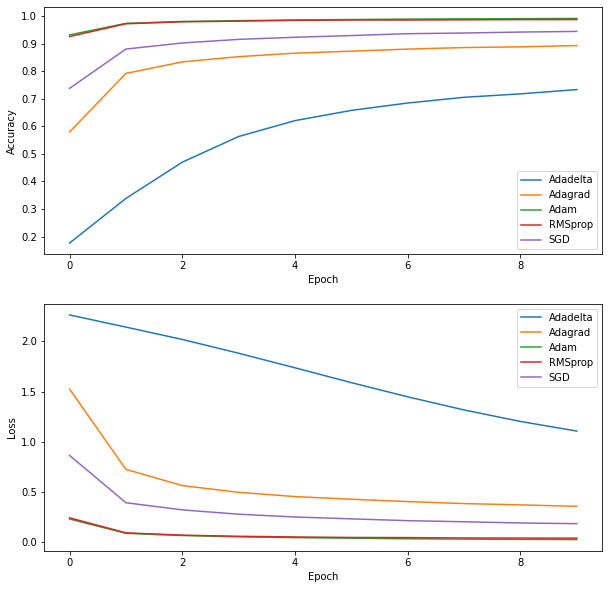

In [10]:
import matplotlib.pyplot as plt

optimizer_list = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
history_dict = {}

# loop over each optimizer and train the model
for optimizer in optimizer_list:
    model = build_model(optimizer)
    history = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1,
                       validation_data=(x_test,y_test))
    history_dict[optimizer] = history.history

# plot the accuracy and loss curves for each optimizer
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
for i, metric in enumerate(['accuracy', 'loss']):
    ax = axes[i]
    for optimizer in optimizer_list:
        history = history_dict[optimizer]
        ax.plot(history[metric], label=optimizer)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.capitalize())
    ax.legend()

plt.show()
